# TFlearn & MNIST
Okay, so before I jump right into classifying me and my girlfriend, I needed some way to get familiar with TFlearn first (or even Tensorflow for that matter). I watched sentdex's entire tutorial series on firing up Tensorflow and TFlearn and decided that TFlearn was a great way for me to ease into the whole world of NNs.

Using the MNIST data set that I had mentioned in my last post, sentdex writes an entire NN with 2 convolutional layers (RELU normalization), 2 max pooling layers, 1 fully connected layer, and 1 fully connected output layer which predicts the probability that an image is a specific number (remember, the MNIST data set consists of 55k classified hand-written digits to train on)... all in under 20 lines of code. Just ridiculous.

<img src="https://lh3.googleusercontent.com/proxy/1kDS9T2f_v3dunkwoTbdfTxbR35d2InFAk9F7aT61yy2VKMtN_DEj7wCf2-IRxUMow=w480-h270-p" style="width: 400px;"/>

## TFlearn and Tensorflow
At its core, Tensorflow is a matrix manipulation library for python that just happens to lend itself well to NNs (I won't pretend like I've coded my own NNs from scratch before, but from what I read, NNs are generally combinations of computationally intensive matrix calculations). Tensorflow itself is written in C++ and CUDA (NVIDIA's language for programming GPUs), but has a python wrapper that allows us to take advantage of it using the python environment and syntax.

TFlearn, then, is an abstracted layer on top of Tensorflow which makes writing Tensorflow code _**even easier**_. I don't want to turn this into a entire post on Tensorflow vs TFlearn, but I do want to post the following two sentdex videos in which he runs through the same MNIST tutorial in both environments for reference:

### sentdex MNIST w/ Tensorflow

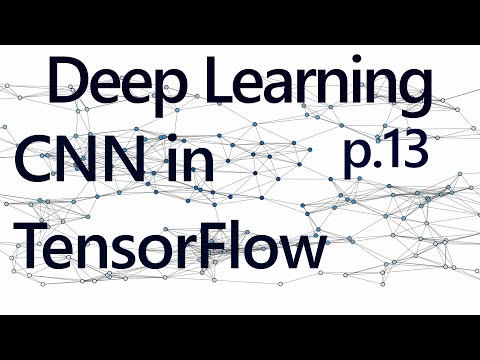

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('mynJtLhhcXk')

### sentdex MNIST w/ TFlearn

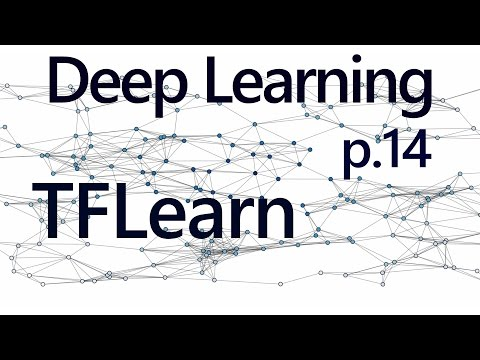

In [3]:
YouTubeVideo('NMd7WjZiCzc')

At this point, I'm just going to continue this post in the context of _**TFlearn**_ and forget about Tensorflow altogether.

## MNIST w/ TFlearn
Let's dive into sentdex's code:

### Initial Config & Setup

In [4]:
# TFlearn libraries
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist

# General purpose libraries
import matplotlib.pyplot as plt
import numpy as np
import math

### Gathering Data
The tflearn library comes with an tflearn.datasets.mnist.load_data() method which automatically extracts x, y, x_test, and y_test for us. Sentdoex does a weird thing with the np.reshape() command which I need to understand a bit better.

In [5]:
# Extract data from mnist.load_data()
x, y, x_test, y_test = mnist.load_data(one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [6]:
# View number of samples in data sets
print 'x has shape {}'.format(x.shape)
print 'y has shape {}'.format(y.shape)
print 'x_test has shape {}'.format(x_test.shape)
print 'y_test has shape {}'.format(y_test.shape)

x has shape (55000, 784)
y has shape (55000, 10)
x_test has shape (10000, 784)
y_test has shape (10000, 10)


It looks like each sample (55k samples in the training set and 10k samples in the test set). Let's just try to output 1 image if we can.

In [7]:
# Get first image of training set
x_first = x[0]
print 'x_first has shape {}'.format(x_first.shape)

x_first has shape (784,)


In [8]:
# Reshape the array into 28 x 28 array (2-dimensional array)
x_first_reshaped = x_first.reshape((28, 28))
print 'x_first_reshaped has the shape {}'.format(x_first_reshaped.shape)

x_first_reshaped has the shape (28, 28)


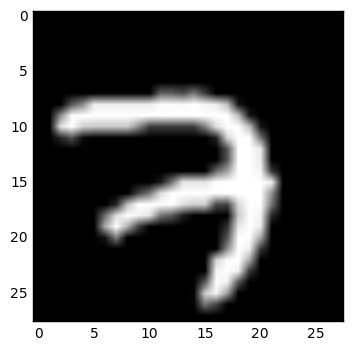

In [9]:
# Plot
plt.imshow(x_first_reshaped, cmap='gray')
plt.show()

Okay, so it's a 7. Here, we reshaped the data from being a _**single array of 784 elements**_ to _**28 arrays of 28 elements each**_.
- 28 arrays (rows of pixels in the image)
    - of 28 elements (pixels in each rows)

So if we back up all the way to just x, x has the shape 55000, 784
- 55000 arrays (each photo)
    - of 784 elements (all pixels of each pixels flattened into one array)
    
And sentdex reshapes it to [-1, 28, 28, 1]

In [10]:
# Reshape x
x_reshaped = x.reshape([-1, 28, 28, 1])
print 'x_reshaped has the shape {}'.format(x_reshaped.shape)

x_reshaped has the shape (55000, 28, 28, 1)


Here, I'm a bit confused as to exactly what the 4 elements in reshape are. Through a bit of research, I've learned that the -1 input means "unknown / undisclosed parameter" which will be figured out by the rest of the parameters.
- E.g. If I were trying to reshape an array of 10 elements into something like (-1, 2), the resulting shape would be 5 rows of 2 elements (5 was inferred by 10 / 2)
- E.g. If I were trying to reshape an array of 10 elements into something like (2, -1), the resulting shape would be 2 rows of 5 elements)

If I try to break it down _**backwards**_ in this way (1, 28, 28, -1)
- 55000 arrays (each photo)
    - of 28 arrays (rows of pixels in the image)
        - of 28 arrays (columns of pixels in each row of the image)
            - of 1 element (each pixel of each column of each row of each image)

In [11]:
# Get first reshaped image of x
x_reshaped_first = x_reshaped[0]

In [12]:
# View x_reshaped_first
x_reshaped_first

array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [

I think I'm right...

In [13]:
# Reshape x_test
x_test_reshaped = x_test.reshape([-1, 28, 28, 1])
print 'x_test_reshaped has the shape {}'.format(x_test_reshaped.shape)

x_test_reshaped has the shape (10000, 28, 28, 1)


In [14]:
print 'x_reshaped has the shape {}'.format(x_reshaped.shape)
print 'x_test_reshaped has the shape {}'.format(x_test_reshaped.shape)
print 'y has the shape {}'.format(y.shape)
print 'y_test has the shape {}'.format(y_test.shape)

x_reshaped has the shape (55000, 28, 28, 1)
x_test_reshaped has the shape (10000, 28, 28, 1)
y has the shape (55000, 10)
y_test has the shape (10000, 10)


### Build Model

In [15]:
# sentdex's code to build the neural net using tflearn
#   Input layer --> conv layer w/ max pooling --> conv layer w/ max pooling --> fully connected layer --> output layer
convnet = input_data(shape = [None, 28, 28, 1], name = 'input')

convnet = conv_2d(convnet, 32, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation = 'relu')
# convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 10, activation = 'softmax')
convnet = regression(convnet, optimizer = 'sgd', learning_rate = 0.01, loss = 'categorical_crossentropy', name = 'targets')

That's all sentdex does to build his 2D CNN. I've obviously have yet to play around with any of the parameters yet, but let's just try to understand his code for a second.

His code consists of
- An input layer
- 2 convolution (with RELU activation) / max pooling layers
- A fully connected layer (with RELU activation)
- Another fully connected layer (with a softmax activation for multi-class classification)
- A final optimizer using the "Adam" optimizer (which I have no idea right now) using cross entropy loss that performs regression on the one-hot encoded labels of each image

A few things I'd like to explore a bit further because I'm just not quite understanding it right now.
1. The inputs to the _**conv_2d**_ and _**max_pool_2d**_ functions
2. The inputs to the _**fully_connected**_ function
3. I've commented out the _**dropout**_ function for now, so I'd like to explore this a bit more before I bring it back in
4. The entire situation that's happening within the _**regression**_ function

Let's just run this once to see what happens (a bit too anxious here to be writing more haha).

In [16]:
model = tflearn.DNN(convnet)
model.fit(
    {'input': x_reshaped}, 
    {'targets': y}, 
    n_epoch = 1, 
    validation_set = ({'input': x_test_reshaped}, {'targets': y_test}), 
    snapshot_step = 500, 
    show_metric = True
)

Training Step: 859  | total loss: 0.35401 | time: 307.926s
| SGD | epoch: 001 | loss: 0.35401 - acc: 0.8938 -- iter: 54976/55000
Training Step: 860  | total loss: 0.35427 | time: 323.254s
| SGD | epoch: 001 | loss: 0.35427 - acc: 0.8919 | val_loss: 0.33149 - val_acc: 0.9030 -- iter: 55000/55000
--


Ok, a few things to note here.

First of all, I set the model to train for only 1 epoch because I wasn't sure how long it would take. Sure enough, the 1 epoch took about 300 to run... good for a speedy 5 mins and then some. In sentdex's tutorial, he trains on 10 epochs on a GPU system he built for himself. Again, I don't have a powerful system, nor does TF even support GPU processing on OSX (I have a MacBook), so training 10 epochs would've taken me roughly _**an hour**_. I mean, it's not like I haven't seen this before... I waited pretty long for some of my xgboost models to train. After some of those models, I legitimately felt like I was wasting time. Didn't want to go down the same path here, but the good news is that even after _**1 epoch**_, we're sitting at _**89.19% accuracy**_! That's kind of insane. From the papers I've read and videos I've watched, this is an extremely poor score relative to the best models out there in the world today for this use case, but isn't it kind of insane that _**I am literally able to copy and paste someone's code, use my shitty laptop to run 1 round of training, and come up with a black box that can recognize almost 89% of handwritten digits**_.

I don't even think I'm oversimplifying it, because that's literally what I just did. I realize that I'm leaving out a ton of details... what if the images have a background, what if the handwritten digit is smaller, what if it's a different color and not grayscale, what if the image has a lot of noise... we can ask a thousand questions challenging why something like this wouldn't work, and I 100% agree that those are the intricacies that make a good data scientist vs a world-class data scientist, but let's just step back and marvel at the fact that _**this thing can frickin recognize 89% of the hand-written digits in the test data set**_... That means that out of the 10k test images, this thing looked at _**8900**_ of the images and actually _**knew what number it was**_.

Now, there are a few things that are blowing my mind here. I mean, let's set the context first that my mind is a naive, I don't have a PhD or even a masters degree, and I don't even quite understand every line of code in that NN yet.

<img src="https://i.giphy.com/media/d2Z1HtgW9mFDnYac/giphy.webp" style="width: 400px;"/>

However, just seeing that accuracy work right in front of my eyes makes this whole concept of image recognition a bit more tangible... You hear stories of all these crazy machine learning applications, but here is one working right in front of my eyes, with data I have on my machine, using the processing power of my shitty laptop. I think that's the first thing blowing my mind... just seeing it work live.

The second thing is realizing how easily such a generic model learns the domain that it's working in. Nowhere in here did I hardcode that 0 is made up of a circle, or that a 2 looks like a backwards 5, or that a 4 is only composed of straight lines... In fact, I never even told the model that I was dealing with _**numbers**_ in any way! I just gave it some pixels values, a one-hot encoded label which doesn't mean anything to the computer anyways, and it figured out what the relationships were between those pixels and the array element that was flagged as a 1. We are simply referring to and perceive it as numbers when we look at the pixels in a 28x28 image, but a computer has no clue what we perceive! This is such a crazy generalization, because this is abstracting the model away from the application. The model is the magic that's performing the correlation detection between the input and the output, and the application can be anything at this point! Numbers, animals, cars... me and my girlfriend!

<img src="http://www.reactiongifs.com/wp-content/uploads/2013/10/tim-and-eric-mind-blown.gif" style="width: 300px;"/>

Now that my brain is finished oozing out all its amazement, let's get back to the code and actually try to figure out what's happening.

### conv_2d
The [conv_2d](http://tflearn.org/layers/conv/#convolution-2d) layer is the first that we run after the input layer. This is the first layer of convolution that we perform. Remember, convolution worked something like this: We use filters to summarize how well a filter matches to a certain part of the base image:

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/chi_lars_face_detection/images/11_convolution_ex_1_1.png" style="width: 500px;"/>

In the Brandon Rohrer video before, we applied 3 of these filter to each base image, creating a "stack" of results:

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/chi_lars_face_detection/images/15_finished_convolution_3_filters.png" style="width: 500px;"/>

In our code above, our conv_2d function is being called like this:
~~~~
convnet = conv_2d(convnet, 32, 2, activation = 'relu')
~~~~

Here, we are telling TFlearn that we want to apply convolution with 32 filters, each of size 2x2 pixels. We normalize the result with the RELU activation function to get rid of negatives (the absolute impact of this I admittedly can't say I'm familiar with right now). One parameter that we don't state explicitly, but takes on the default value of essentially 1 is the _**strides**_ parameter. This means the convolution window will move 1 pixel at a time in either direction.

### max_pool_2d
The [max_pool_2d](http://tflearn.org/layers/conv/#max-pooling-2d) layer comes after the convolutional layer. Pretty simple, we choose a window and slide it across and summarize that entire window by the max value found in that window (note that in our actual network, there should be no negative values since we applied RELU activation in the convolution step):

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/chi_lars_face_detection/images/16_max_pooling_ex_1_1.png" style="width: 400px;"/>

Each layer in the "stack" of the output of our convolutional layer will get max pooled:

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/chi_lars_face_detection/images/20_max_pooling_3_filters.png" style="width: 400px;"/>

In our code, our max_pool_2d function is being called like this:
~~~~
convnet = max_pool_2d(convnet, 2)
~~~~

Here, we are telling TFlearn that we want to apply max pooling with windows of size (the documentation refers to this as kernel size) 2x2 pixels. Like conv_2d, max_pool_2d also takes on a _**strides**_ parameter that moves the same amount as the window size by default, indicating that no two max pooling windows would ever overlap with each other. max_pool_2d also takes on the default value of _**"same"**_ as the _**padding**_ parameter, which indicates that if a window hangs off the side of a layer, we just want to pad it with the same values as the edge of the image:

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/chi_lars_face_detection/images/18_max_pooling_ex_1_3.png" style="width: 400px;"/>

In this case, the two empty pixels in the window would be filled with the 2 on the edge of the image.

### conv_2d + max_pool_2d
We perform this convolution + max pooling process twice.
1. The first time, we perform convolution with 32 filters, size 2, and then max pool with a window size 2
2. The second time, we perform convolution with 64 filters, size 2, and then max pool with a window size 2

With each convolution and max pooling step, we are decreasing the size of the image ultimately and decreasing the number of inputs to our fully connected neural network to follow. I can't find an easy way to check the contents of an intermediate layer within my NN, but I can infer theoretically lol:
1. The first convolutional layer will take in one 28x28 image and yield thirty-two 27x27 convoluted images
2. The first max pooling layer will take in thirty-two 27x27 convoluted images and reduce them down to thirty-two 14x14 images
3. The second convolutional layer will take in thirty-two 14x14 images and yield... 2048 13x13 images...? I'm not sure if this is correct...
4. The second max pooling layer will take in 2048 13x13 convoluted images and reduce them down to 2048 7x7 images

Something to the tune of this...
<img src="http://www.pyimagesearch.com/wp-content/uploads/2016/06/lenet_architecture.png" style="width: 600px;"/>

### fully_connected
~~~~
convnet = fully_connected(convnet, 1024, activation = 'relu')
~~~~

This is just spinning up a vanilla fully connected layer with 1024 units, half the amount of inputs that we have to the layer.

### fully_connected output
~~~~
convnet = fully_connected(convnet, 10, activation = 'softmax')
~~~~

Here, we have another fully connected layer acting as our output layer with 10 units and a softmax activation function for our end goal of multi-class classification of 10 classes (numbers 1-10).

### regression
~~~~
convnet = regression(
    convnet, 
    optimizer = 'sgd', 
    learning_rate = 0.01, 
    loss = 'categorical_crossentropy', 
    name = 'targets'
)
~~~~

The last one (always?) seems to be the estimator layer where we finally define our optimizer and loss function. Our optimizer is the method in which we'd like to perform gradient descent, and our loss function is how we want to measure our gradient descent. I actually lied a bit in that I copied and pasted sentdex's code directly. sentdex is using the "adam" optimizer, but I don't really know what "adam" means yet, and my objective here is not quite to explore optimizers, so I just chose something that I knew... Stochastic gradient descent (sgd). Note that sentdex achieves something like 97/98% accuracy in his model, which I can only attribute to the changing of the optimizer (as well as the number of epochs). The loss function is "categorical_crossentropy", which seems like the one to use for multi-class classification (there also is a "softmax_crossentropy", but it seems to do the same thing as "categorical_crossentropy"... Not quite sure right now... Will explore this later if need be.

## Summary
Ok, so I've got something that gets up to 89% accuracy... on 1 epoch. Again, sentdex runs his model for 10 epochs which took him... I dunno... less than 5 minutes. Clearly not the case for me, and I really, really would like to not go down that rabbit hole because I'll probably be running a bunch of models, playing around with different parameters and I'll have to train like 10 CNNs of 10 epochs each... I don't have 10 hours to spare, unfortunately!

And here, we hit a brick wall of computation... In the next post(s), I'll be looking at AWS and the magnificent cloud.

<img src="https://i.ytimg.com/vi/Z7Ro7oxKKVc/hqdefault.jpg" style="width: 400px;"/>

Lmao... I'm gonna have to use that one for my next presentation.